<a href="https://colab.research.google.com/github/Liping-LZ/BDAO_ECDA_2425/blob/main/Big%20Data%20Analytics/Sentiment_analysis_using_Google_Natural_Language_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# First, we need to load the dataset into Google Colab.
# This statement allows you to select the file from your laptop and upload it to Google Cloud.
# Please wait until you see 100% done and the play button is resumed. it might take a while to upload because the dataset is large

# Import necessary Python libraries
from google.colab import files

#Upload the dataset to Google Colab
uploaded = files.upload()

Saving Anydo_review_new.csv to Anydo_review_new.csv


In [1]:
# once you upload the data to the cloud, you can read the data into dataframe.
# Remember, if you close the notebook or disconnect, you need to upload the file (run the code above) again before you read data.

import pandas as pd

data = 'Anydo_review_new.csv' # change the csv file name to your file name that you uploaded
df = pd.read_csv(data)
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at
0,gp:AOqpTOEcWS_b8b4P2gClKovxXAPg3il0AD0ZnGw9RxY...,Unable to use it as it won't work with my Goog...,1,13,5.7.0.20,11/01/2021 01:12
1,gp:AOqpTOEidRmDaHGYPZW21SVfBkeqTruAzg7LAmCPL2_...,I downloaded this because of the cross platfor...,1,81,5.7.0.20,22/12/2020 18:31
2,gp:AOqpTOEJfVU5Os7_8CNOu_mpy2AlDz8kFxEFMeBMnxC...,I am starting to hate this app! Every time the...,1,67,5.7.0.10,02/12/2020 15:52
3,gp:AOqpTOFSPaoOVarqwKF86e7-TPUyV6BanSXKRNFGb6G...,"Liked Any.do at first, enough that I even sign...",1,102,5.7.0.10,22/11/2020 23:42
4,gp:AOqpTOEmghRiCCy0_FYbWBSoRm2ff2hzFTbEjgQ9svu...,They made me sign up for premium just to have ...,1,2,5.7.0.20,31/12/2020 01:49


In [2]:
# Change your target_column to the column with review data

target_column = 'content'

## **2. Text cleaning**

In [3]:
# drop data with missing values in the 'content' column (target_column)
df = df.dropna(subset=[target_column])

In [4]:
# convert the relevant column to lowercase
df[target_column] = df[target_column].str.lower()

In [5]:
# remove contraction
!pip install contractions
import contractions
df[target_column] = df[target_column].map(lambda x: contractions.fix(x))

# Remove unwanted characters/objects (e.g. url, email, emoji etc.). You don't need to run all of them, but just take the ones suitable for your case.
# import the re library. Re is a built-in python package, which can be used to work with Regular Expressions.

import re

# Remove new line characters ("/n")

df[target_column] = df[target_column].map(lambda x: re.sub('\s+', ' ', x))

# Remove url link
df[target_column] = df[target_column].apply(lambda x: re.sub('http://\S+|https://\S+', '', x))

# Remove email address
df[target_column] = df[target_column].map(lambda x: re.sub('\S*@\S*\s?', '', x))

# Remove emoji
# First, build a list of commonly used emojis
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

# Then remove the emoji
df[target_column] = df[target_column].map(lambda x: re.sub(emoj, ' ', x))

# Remove non-word characters, so numbers and ___ etc
df[target_column] = df[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove overspace
df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

In [6]:
df.head()

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at
0,gp:AOqpTOEcWS_b8b4P2gClKovxXAPg3il0AD0ZnGw9RxY...,unable to use it as it will not work with my g...,1,13,5.7.0.20,11/01/2021 01:12
1,gp:AOqpTOEidRmDaHGYPZW21SVfBkeqTruAzg7LAmCPL2_...,i downloaded this because of the cross platfor...,1,81,5.7.0.20,22/12/2020 18:31
2,gp:AOqpTOEJfVU5Os7_8CNOu_mpy2AlDz8kFxEFMeBMnxC...,i am starting to hate this app every time they...,1,67,5.7.0.10,02/12/2020 15:52
3,gp:AOqpTOFSPaoOVarqwKF86e7-TPUyV6BanSXKRNFGb6G...,liked any do at first enough that i even signe...,1,102,5.7.0.10,22/11/2020 23:42
4,gp:AOqpTOEmghRiCCy0_FYbWBSoRm2ff2hzFTbEjgQ9svu...,they made me sign up for premium just to have ...,1,2,5.7.0.20,31/12/2020 01:49


## **3. Using Google Natural Language API to do sentiment analysis**
The powerful pre-trained models of the Natural Language API empowers developers to easily apply natural language understanding (NLU) to their applications with features including sentiment analysis, entity analysis, entity sentiment analysis, content classification, and syntax analysis.

### 3.1 Enable API and create credentials

First, you need to enable Google Natural Language API in Google Cloud. Please search for "Cloud Natural Language API" and then click "Enable". Once enabled, there should be a dashboard of API. Please click "Credidentials" on the left menu. Then click "+ CREATE CREDENTIALS" on the top menu. Please choose "Service account". Give it a name for your service account and then continue. Set the role as "Editor" and press continue and done. Once the service account set up. You need to click into the service account and then click "Keys". We need to "add key" - choose "create new key" and then a json file will be downloaded to your laptop. We will need to upload this key file.

### 3.2 Authentication

To connect with API and interact with Google Cloud Natural Language API, we need to get authentication. In this case, we upload our key of the service account we have created and then point to the key file.




In [7]:
# Replace with your actual project ID
project_id = 'bdao-ecda'
!gcloud config set project {project_id}

Updated property [core/project].


In [8]:
from google.colab import files
uploaded = files.upload()  # Upload your JSON key file when prompted

Saving bdao-ecda-59ba9c4d8d50.json to bdao-ecda-59ba9c4d8d50.json


In [9]:
# Set environment variable to point to the key file
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/bdao-ecda-59ba9c4d8d50.json'

In [10]:
# Here we test with one text

from google.cloud import language_v2

def analyze_sentiment(text):
    client = language_v2.LanguageServiceClient()

    document = language_v2.Document(
        content=text,
        type_=language_v2.Document.Type.PLAIN_TEXT
    )

    sentiment = client.analyze_sentiment(
        request={"document": document}
    ).document_sentiment

    print(f"Text: {text}")
    print(f"Sentiment score: {sentiment.score:.2f} (-1.0 negative to 1.0 positive)")
    print(f"Sentiment magnitude: {sentiment.magnitude:.2f} (strength of emotion)")

    return sentiment

# Test with a sample text
analyze_sentiment("I'm really excited to use Google Cloud Natural Language API!")

Text: I'm really excited to use Google Cloud Natural Language API!
Sentiment score: 0.94 (-1.0 negative to 1.0 positive)
Sentiment magnitude: 0.99 (strength of emotion)


magnitude: 0.985
score: 0.944

In [11]:
# Now we will run the sentiment analysis for all reviews

import pandas as pd
from google.cloud import language_v2
import time
from tqdm.notebook import tqdm  # For progress tracking in Colab

def analyze_sentiment_batch(df, text_column, batch_size=10):
    """
    Analyze sentiment for texts in a dataframe with batching.
    No async/await is used in this function.

    Args:
        df: DataFrame containing text to analyze
        text_column: Name of the column with text content
        batch_size: Number of texts to process in each batch

    Returns:
        DataFrame with sentiment scores and magnitudes added
    """
    # Initialize the client
    client = language_v2.LanguageServiceClient()

    # Create a copy of the input dataframe
    result_df = df.copy()

    # Initialize sentiment columns
    result_df['sentiment_score'] = None
    result_df['sentiment_magnitude'] = None

    # Get list of texts to process
    texts = df[text_column].tolist()

    # Process in batches
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing batches"):
        # Get current batch
        batch_indices = range(i, min(i + batch_size, len(texts)))

        # Process each text in the batch
        for idx in batch_indices:
            text = texts[idx]

            # Skip empty or non-string entries
            if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
                result_df.loc[df.index[idx], 'sentiment_score'] = None
                result_df.loc[df.index[idx], 'sentiment_magnitude'] = None
                continue

            try:
                # Create document object
                document = language_v2.Document(
                    content=text,
                    type_=language_v2.Document.Type.PLAIN_TEXT
                )

                # Get sentiment
                sentiment = client.analyze_sentiment(
                    request={"document": document}
                ).document_sentiment

                # Store results
                result_df.loc[df.index[idx], 'sentiment_score'] = sentiment.score
                result_df.loc[df.index[idx], 'sentiment_magnitude'] = sentiment.magnitude

            except Exception as e:
                print(f"Error processing text at index {idx}: {str(e)}")
                result_df.loc[df.index[idx], 'sentiment_score'] = None
                result_df.loc[df.index[idx], 'sentiment_magnitude'] = None

        # Add delay between batches to avoid rate limits
        if i + batch_size < len(texts):
            time.sleep(1)  # 1.5 second delay between batches

    return result_df

# Example usage
result_df = analyze_sentiment_batch(df, 'content', batch_size=10)

Processing batches:   0%|          | 0/120 [00:00<?, ?it/s]

In [12]:
result_df

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,sentiment_score,sentiment_magnitude
0,gp:AOqpTOEcWS_b8b4P2gClKovxXAPg3il0AD0ZnGw9RxY...,unable to use it as it will not work with my g...,1,13,5.7.0.20,11/01/2021 01:12,-0.861,0.976
1,gp:AOqpTOEidRmDaHGYPZW21SVfBkeqTruAzg7LAmCPL2_...,i downloaded this because of the cross platfor...,1,81,5.7.0.20,22/12/2020 18:31,-0.402,0.98
2,gp:AOqpTOEJfVU5Os7_8CNOu_mpy2AlDz8kFxEFMeBMnxC...,i am starting to hate this app every time they...,1,67,5.7.0.10,02/12/2020 15:52,-0.879,0.986
3,gp:AOqpTOFSPaoOVarqwKF86e7-TPUyV6BanSXKRNFGb6G...,liked any do at first enough that i even signe...,1,102,5.7.0.10,22/11/2020 23:42,-0.853,0.975
4,gp:AOqpTOEmghRiCCy0_FYbWBSoRm2ff2hzFTbEjgQ9svu...,they made me sign up for premium just to have ...,1,2,5.7.0.20,31/12/2020 01:49,-0.861,0.967
...,...,...,...,...,...,...,...,...
1195,gp:AOqpTOGmgLgh8PwXgOObwbBg_dnpIUHZLr_pK2nbgPG...,,5,0,5.7.0.20,31/12/2020 03:24,None,None
1196,gp:AOqpTOF9aVujtGVYkJvRG_ZVa40f6mTUqzWmn8I4lWo...,easy to use intuitive and neat interface,5,1,5.7.0.20,30/12/2020 18:56,0.943,0.984
1197,gp:AOqpTOEtYM_DrJqQMBG3jzzYPn3P7FDSvvMgN7KMyTn...,amazing app but when i add a task it goes to t...,5,1,5.7.0.20,30/12/2020 07:19,-0.041,0.978
1198,gp:AOqpTOGk8J4J6nZnwPPAcUetgxRBNyOht2BneUY-mo3...,nice,5,0,NaN,30/12/2020 06:49,0.938,0.981


<Axes: xlabel='sentiment_score', ylabel='Count'>

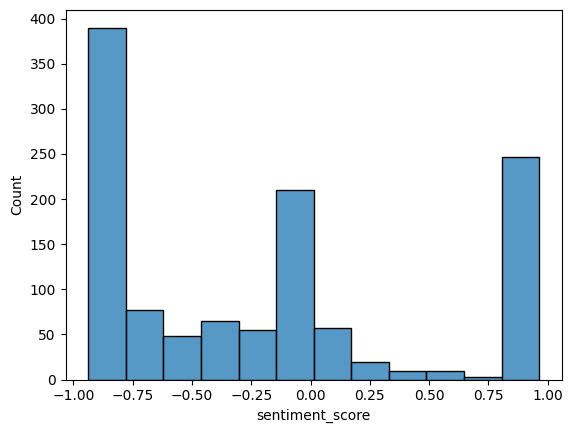

In [14]:
import matplotlib.pyplot as plt # we use this for visualisation
import seaborn as sns # we use this for visualisation

# distribution plot sentiment_score
sns.histplot(result_df['sentiment_score'])

<Axes: xlabel='score', ylabel='Count'>

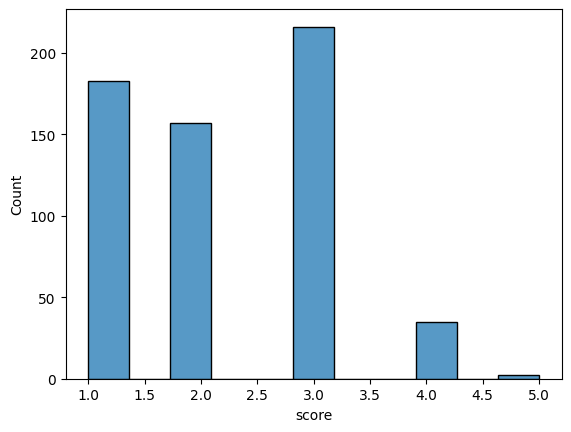

In [16]:
# plot the distribution of score while sentiment score is smaller than -0.25 (negative)
sns.histplot(result_df[result_df['sentiment_score']<-0.25]['score'])

<Axes: xlabel='score', ylabel='Count'>

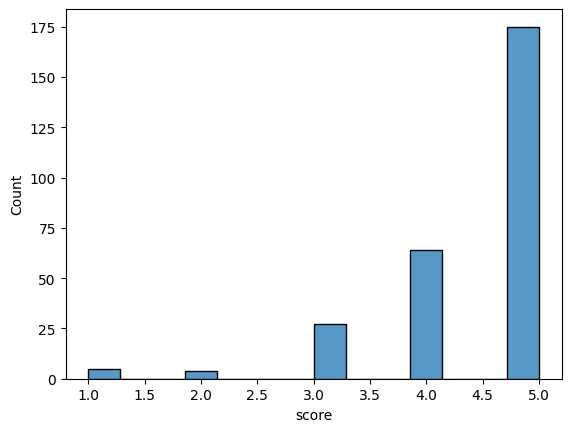

In [17]:
# plot the distribution of score while sentiment score is larger than 0.25 (positive)
sns.histplot(result_df[result_df['sentiment_score']>0.25]['score'])

Please check this link to understand how to interpret the sentiment analysis values: https://cloud.google.com/natural-language/docs/basics#interpreting_sentiment_analysis_values